<a href="https://colab.research.google.com/github/AryaPulkit/Elucidata_DataScience/blob/main/Elucidata_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cmapPy

In [2]:
import pandas as pd
from cmapPy.pandasGEXpress.parse_gct import parse

In [3]:
import random
from cmapPy.pandasGEXpress.parse import parse
from matplotlib import colors as mcolors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
data = parse('/content/drive/My Drive/data_analyst_intern/PAAD.gct')

In [5]:
print(data)  #gct data -> Gene Cluster Text data contains matrix-compatible 3D dataframes. contains Data,row metadata , col metadata

GCT1.3
src: /content/drive/My Drive/data_analyst_intern/PAAD.gct
data_df: [18465 rows x 183 columns]
row_metadata_df: [18465 rows x 0 columns]
col_metadata_df: [183 rows x 124 columns]


In [6]:
#Renaming the dataframes for convenience.
data_df = data.data_df
row_metadata_df = data.row_metadata_df
col_metadata_df = data.col_metadata_df

In [7]:
print("data : ",data_df.shape)
print("col metadata:" ,col_metadata_df.shape)
print("col metadata:" ,row_metadata_df.shape)

data :  (18465, 183)
col metadata: (183, 124)
col metadata: (18465, 0)


In [8]:
col_metadata_df.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,b_symptoms,bcr,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,clinical_m,clinical_n,clinical_stage,clinical_t,course_number,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,days_to_psa,disease_code,drugs,...,person_neoplasm_cancer_status,prescribed_dose,prescribed_dose_units,primary_lymph_node_presentation_assessment,primary_pattern,primary_therapy_outcome_success,progression_determined_by-3,project_code,psa_value,race,radiation_therapy,radiation_type_notes,radiations,regimen_number,relative_cancer_type-2,relative_cancer_type,residual_tumor,route_of_administration,secondary_pattern,serum_markers,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tertiary_pattern,therapy_type_notes,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,NaN,nationwide children's hospital,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-23962,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,1988.0,whipple,7,yes,NaN,NaN,no,yes,2j,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,NaN,nationwide children's hospital,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-17794,NaN,0.0,0.0,-292.0,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,NaN,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,NaN,nationwide children's hospital,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-27600,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,with tumor,NaN,NaN,yes,NaN,progressive disease,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,71,no,NaN,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,5749429c-5ac9-40de-b44e-3b795520ec07,NaN,NaN,NaN,tcga-2j-aab8-f62434,daf7d897-0ed7-48ec-ae70-080dd8d7d6bd,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-26028,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,NaN,NaN,tcga,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,r1,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,panc

In [9]:
data_df.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,6.9,4.60,NaN,6.20,4.5,3.1,5.7,5.30,1.2,4.7,4.20,5.2,5.60,7.5,7.40,5.20,5.6,1.30,2.10,6.9,7.2,6.6,8.3,7.00,8.5,3.10,8.20,5.20,2.70,2.20,...,4.5,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.90,7.00,6.0,4.20,5.4,5.3,1.1,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.8,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,1.6,0.70,-0.9,0.30,1.3,NaN,NaN,NaN,-0.1,1.3,NaN,NaN,NaN,0.3,1.10,1.50,NaN,1.00,-0.40,3.6,NaN,-0.8,-1.0,NaN,NaN,0.40,NaN,-1.30,NaN,NaN,...,NaN,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,NaN,0.00,-0.1,NaN,NaN,NaN,NaN,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0.90,NaN,6.60,0.6,0.4,-1.10,-0.70,1.0,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [10]:
data_df.values

array([[ 7.45,  8.1 ,  7.2 , ...,  7.35,  7.2 ,  9.05],
       [ 6.4 ,  5.8 ,  6.4 , ...,  7.9 ,  6.  ,  6.9 ],
       [ 4.7 ,  5.7 ,  3.  , ...,  1.2 ,  4.9 ,  2.  ],
       ...,
       [10.1 ,  9.8 ,  9.8 , ...,  9.8 ,  9.6 , 10.9 ],
       [ 9.3 ,  8.9 ,  9.2 , ...,  8.6 ,  8.4 ,  9.4 ],
       [ 5.5 ,  4.5 ,  4.7 , ...,  5.9 ,  2.4 ,  5.4 ]], dtype=float32)

In [11]:
#cleaning of data: Removing the genes from 1st dataframe, which have NULL values in it.
data_df_clean = data_df.dropna()

In [12]:
data_df_clean.shape

(14098, 183)

In [13]:
data_df_clean  #rows -> genes and column -> Samples

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,13.5,14.60,14.7,14.40,14.7,13.3,13.5,12.50,12.9,13.5,13.90,14.4,14.50,13.0,13.80,13.80,14.6,13.60,13.70,12.8,13.9,14.1,12.6,12.00,11.6,13.30,12.80,14.40,12.70,13.50,...,14.3,14.20,14.6,14.50,14.9,13.4,14.7,14.4,13.0,12.40,14.30,14.3,13.90,13.4,13.3,14.1,13.10,14.10,14.1,15.1,13.2,13.6,14.30,14.0,11.50,13.2,13.9,12.70,14.50,14.8,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,7.8,8.70,10.3,10.50,9.5,10.5,9.0,8.60,8.6,8.7,10.10,9.3,9.10,9.4,9.50,8.10,10.1,9.90,9.70,8.9,8.1,9.7,7.0,9.70,7.1,10.50,6.60,8.40,10.00,8.60,...,9.0,9.50,9.7,9.80,9.5,9.2,9.5,8.9,9.8,10.10,10.20,8.6,9.50,10.1,9.6,9.3,9.80,8.30,8.2,9.3,7.0,9.6,8.50,9.2,9.20,7.2,10.0,7.80,9.50,8.9,9.10,9.50,10.0,9.50,9.1,10.

In [14]:
data_df_clean.index.values

array(['SLC35E2', 'A1BG', 'A2LD1', ..., 'ZYX', 'ZZEF1', 'ZZZ3'],
      dtype=object)

In [15]:
data_df_clean.values

array([[ 7.45,  8.1 ,  7.2 , ...,  7.35,  7.2 ,  9.05],
       [ 6.4 ,  5.8 ,  6.4 , ...,  7.9 ,  6.  ,  6.9 ],
       [ 7.5 ,  6.8 ,  7.3 , ...,  6.5 ,  6.9 ,  6.7 ],
       ...,
       [12.9 , 12.4 , 13.5 , ..., 13.2 , 12.3 , 12.3 ],
       [10.1 ,  9.8 ,  9.8 , ...,  9.8 ,  9.6 , 10.9 ],
       [ 9.3 ,  8.9 ,  9.2 , ...,  8.6 ,  8.4 ,  9.4 ]], dtype=float32)

In [16]:
#Creating numpy array for further analysis. (We'll use PCA Technique for dimensionality reduction)
normalized_data_array = data_df_clean.values.T

In [17]:
normalized_data_array.shape

(183, 14098)

In [18]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(normalized_data_array)

In [20]:
normalized_data

array([[-0.7577025 ,  0.00303829,  0.91287845, ...,  0.7644486 ,
        -0.13685629,  0.21507382],
       [ 0.33015215, -0.5529512 , -0.0698081 , ...,  0.0195381 ,
        -0.6550251 , -0.71100837],
       [-1.1761079 ,  0.00303829,  0.6321111 , ...,  1.6583418 ,
        -0.6550251 , -0.01644728],
       ...,
       [-0.9250645 ,  1.3930123 , -0.49095982, ...,  1.2113951 ,
        -0.6550251 , -1.4055673 ],
       [-1.1761079 , -0.36762154,  0.0705756 , ..., -0.12944314,
        -1.0004705 , -1.8686094 ],
       [ 1.9200919 ,  0.46636298, -0.21019246, ..., -0.12944314,
         1.2449251 ,  0.4465927 ]], dtype=float32)

# Variance of PCA:

In [21]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

In [22]:
#Variance of PCA
print(pca.explained_variance_ratio_)

[0.16429944 0.11939823]


In [23]:
pca_data.shape

(183, 2)

,0
0,0.164299
1,0.119398


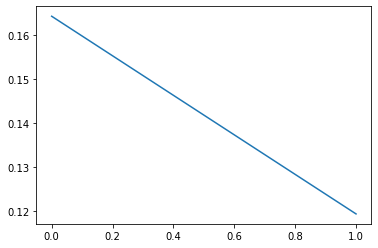

In [24]:
var = pca.explained_variance_ratio_ 
plt.plot(var)
pd.DataFrame(var)

# **Using PCA data to Plot the scatter graph**
Here I used the Column 'histological_type_other' data to seperate the two type of cancers.

In [25]:
#list of all unique labels in column histological_type_other.
histological_type_other_unique = [str(i) for i in list(col_metadata_df['histological_type_other'].unique())]
histological_type_other_unique

['invasive adenocarcinoma',
 'invasive, well-differentiated',
 'nan',
 'poorly differentiated adenocarcinoma',
 'neuroendocrine',
 'neuroendocrine carcinoma nos',
 '82463 neuroendocrine carcinoma nos',
 'neuroendocrine carcinoma',
 'adenocarcinoma, nos',
 'poorly differentiated pancreatic adenocarcinoma',
 'not specified',
 'intraductal tubulopapillary neoplasm',
 'ductal and micropapillary',
 'adenocarcinoma- nos',
 'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%']

In [26]:
#Assigning colour red to neuroendocrine
color_list = ["violet", "brown", "blue", "maroon", "red", "red", "red", "red", "blue", "lightyellow", "darkgreen", "deeppink", "royalblue", "gray", "red"]

In [27]:
color_dict = dict()
for label, color_list in zip(histological_type_other_unique, color_list):
    color_dict[label] = color_list
color_dict

{'82463 neuroendocrine carcinoma nos': 'red',
 'adenocarcinoma, nos': 'blue',
 'adenocarcinoma- nos': 'gray',
 'ductal and micropapillary': 'royalblue',
 'intraductal tubulopapillary neoplasm': 'deeppink',
 'invasive adenocarcinoma': 'violet',
 'invasive, well-differentiated': 'brown',
 'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%': 'red',
 'nan': 'blue',
 'neuroendocrine': 'red',
 'neuroendocrine carcinoma': 'red',
 'neuroendocrine carcinoma nos': 'red',
 'not specified': 'darkgreen',
 'poorly differentiated adenocarcinoma': 'maroon',
 'poorly differentiated pancreatic adenocarcinoma': 'lightyellow'}

In [28]:
color_labels = [color_dict[str(i)] for i in list(col_metadata_df['histological_type_other'])]

# PCA Scatter plot:


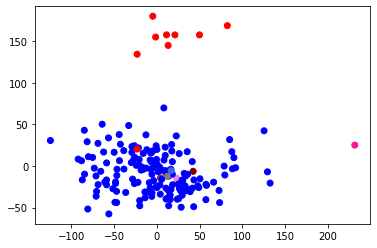

In [29]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=color_labels)

We can see that most of the points are concentrated in the particular range of PC1 and PC2 values. So we can separate the samples from Neuroendocrine and Exocrine. The outliers in **RED** which are PC2 > 100 are Neuroendocrine.So in next step, We'll remove the outlier samples from the dataframe to filter out Neuroendocrine.

In [30]:
#Creating a list of Index
rid = list(data_df_clean.index.values.tolist()) 
cid = list(data_df_clean.columns.values.tolist())
print("Row id:", rid[:5])
print("Column id:", cid[:5])

Row id: ['SLC35E2', 'A1BG', 'A2LD1', 'A2M', 'A4GALT']
Column id: ['aab1-Primary solid Tumor', 'aab4-Primary solid Tumor', 'aab6-Primary solid Tumor', 'aab8-Primary solid Tumor', 'aab9-Primary solid Tumor']


In [31]:
len(cid)

183

In [32]:
(pca_data.shape)

(183, 2)

In [33]:
#creating a dataframe of PCA data and using CID index
pca_dataframe = pd.DataFrame(pca_data, columns=['PC1', 'PC2'], index=cid)
pca_dataframe.head()

,PC1,PC2
aab1-Primary solid Tumor,23.225328,-14.563449
aab4-Primary solid Tumor,4.242101,-14.212631
aab6-Primary solid Tumor,28.721027,-27.624331
aab8-Primary solid Tumor,-0.725019,-24.624258
aab9-Primary solid Tumor,0.321680,2.133423


In [34]:
neuroendocrine_index = pca_dataframe[  (pca_dataframe['PC2'] > 100)].index
neuroendocrine_index

Index(['aaqm-Primary solid Tumor', 'a9ij-Primary solid Tumor',
       'a9il-Primary solid Tumor', 'a9in-Primary solid Tumor',
       'a9io-Primary solid Tumor', 'a9ir-Primary solid Tumor',
       'a9is-Primary solid Tumor', 'a9iv-Primary solid Tumor'],
      dtype='object')

In [35]:
print('Number of Neuroendocrine Tumors are: {}'.format(len(neuroendocrine_index)))

Number of Neuroendocrine Tumors are: 8


In [36]:
pca_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     183 non-null    float32
 1   PC2     183 non-null    float32
dtypes: float32(2)
memory usage: 2.9+ KB


In [38]:
pca_dataframe.drop(neuroendocrine_index, inplace=True) #Dropping Neuroendocrine from PCA dataframe

# Dropping Neuroendocrine from tumors from the dataset so that it contains only the adenocarcinoma tumor samples.

In [39]:
data_df_clean.drop(neuroendocrine_index,axis = 1)

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9iu-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,aaay-Primary solid Tumor,aaaz-Primary solid Tumor,6879-Primary solid Tumor,6880-Primary solid Tumor,7273-Primary solid Tumor,7276-Primary solid Tumor,a44g-Primary solid Tumor,a44h-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,6.4,8.25,8.55,7.5,7.65,7.45,8.05,7.65,7.85,8.05,8.0,7.6,7.85,9.1,8.2,8.45,7.05,8.15,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,7.3,6.10,7.20,6.5,7.10,6.50,6.20,6.70,5.30,5.10,6.9,5.1,4.50,6.2,6.3,5.80,6.50,7.00,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,7.7,7.10,7.50,6.0,6.50,7.30,6.60,7.00,6.80,6.80,7.3,7.5,6.30,8.9,5.9,6.20,6.60,7.00,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,13.5,14.60,14.7,14.40,14.7,13.3,13.5,12.50,12.9,13.5,13.90,14.4,13.0,13.80,13.80,14.6,13.60,13.70,13.30,14.40,12.70,13.50,14.9,13.8,12.90,14.1,15.6,14.80,13.30,14.50,...,14.3,14.20,14.6,14.50,14.9,13.4,14.7,14.4,13.0,12.40,14.30,14.3,13.90,13.4,13.3,14.1,13.10,14.10,14.1,15.1,13.2,13.6,14.30,14.0,11.50,13.2,13.9,12.70,14.50,14.8,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,7.8,8.70,10.3,10.50,9.5,10.5,9.0,8.60,8.6,8.7,10.10,9.3,9.4,9.50,8.10,10.1,9.90,9.70,10.50,8.40,10.00,8.60,9.5,9.4,7.30,8.0,9.1,9.10,9.50,9.10,...,9.0,9.50,9.7,9.80,9.5,9.2,9.5,8.9,9.8,10.10,10.20,8.6,9.50,10.1,9.6,9.3,9.80,8.30,8.2,9.3,7.0,9.6,8.50,9.2,9.20,7.2,10.0,7.80,9.50,8.9,9.10,9.50,10.0,9.50,9.1

# To plot the gene expression, for pancreatic adenocarcinoma, We'll create a dataframe with these 25 genes as rows and the Sample name (Which is the index of the pca_dataframe dataframe.) as columns.



In [40]:
with open('/content/drive/My Drive/data_analyst_intern/type1_IFN.txt', 'r') as f:
    content = f.readlines()

In [41]:
content

['IFIT1\n',
 'IFI44\n',
 'IFIT3\n',
 'MX2\n',
 'OAS1\n',
 'OAS3\n',
 'BST2\n',
 'IFITM1\n',
 'MX1\n',
 'STAT1\n',
 'IFI27\n',
 'CXCL10\n',
 'IFI16\n',
 'IFI30\n',
 'IFIH1\n',
 'IFIT2\n',
 'IFITM2\n',
 'IRF1\n',
 'IRF9\n',
 'IRGM\n',
 'ISG15\n',
 'OAS2\n',
 'PSME1\n',
 'SOCS1\n',
 'STAT2\n']

In [42]:
content = [x.strip() for x in content]

In [43]:
content

['IFIT1',
 'IFI44',
 'IFIT3',
 'MX2',
 'OAS1',
 'OAS3',
 'BST2',
 'IFITM1',
 'MX1',
 'STAT1',
 'IFI27',
 'CXCL10',
 'IFI16',
 'IFI30',
 'IFIH1',
 'IFIT2',
 'IFITM2',
 'IRF1',
 'IRF9',
 'IRGM',
 'ISG15',
 'OAS2',
 'PSME1',
 'SOCS1',
 'STAT2']

In [48]:
data_df.info() # we will filter the 25genes using contents list

<class 'pandas.core.frame.DataFrame'>
Index: 18465 entries, SLC35E2 to psiTPTE22
Columns: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
dtypes: float32(183)
memory usage: 13.7+ MB


In [51]:
ifn1 = data_df[data_df.index.isin(content)]

In [50]:
ifn1

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BST2,12.2,12.7,12.7,11.9,10.4,10.9,11.7,11.7,9.9,10.8,10.8,11.5,11.6,11.1,10.8,11.1,11.2,11.0,13.7,12.3,10.5,12.8,9.8,10.5,10.7,11.2,12.8,11.3,12.3,8.7,10.2,10.7,8.7,8.2,7.3,10.6,8.6,11.3,12.1,11.1,...,11.8,12.7,11.3,12.6,11.3,12.6,11.6,11.5,10.5,11.8,12.2,10.8,12.2,13.0,12.9,11.8,12.2,11.1,10.6,11.7,10.5,10.6,11.6,11.9,8.4,10.5,12.2,11.4,11.7,11.1,11.0,11.0,11.8,11.0,12.0,12.2,12.5,12.9,13.4,11.6
CXCL10,9.4,8.7,8.8,7.2,6.6,4.0,5.2,9.4,6.2,5.3,7.6,6.4,10.8,9.1,7.1,5.3,4.6,6.5,5.0,5.9,7.6,8.2,5.1,4.1,7.6,6.6,7.0,5.8,7.2,1.9,4.7,5.5,-1.0,4.7,1.9,6.5,3.3,5.8,6.8,5.6,...,6.7,6.1,6.5,8.0,8.8,5.2,6.1,7.8,4.6,5.5,6.6,7.0,8.8,9.5,4.9,6.9,6.1,8.3,6.5,8.6,5.6,7.0,9.3,8.6,5.2,3.7,5.8,5.4,7.2,5.2,5.8,5.3,5.8,9.0,6.0,6.1,8.1,8.5,5.1,8.6
IFI16,11.0,11.3,12.3,12.3,11.2,11.1,12.3,11.7,10.9,11.1,11.7,11.4,12.4,11.8,11.2,11.3,10.6,11.4,11.4,11.4,11.5,11.5,10.0,10.3,11.4,10.6,11.9,11.2,11.2,9.2,9.2,9.8,8.2,7.9,6.7,11.0,9.3,11.8,10.9,11.0,...,12.1,11.7,12.4,12.2,11.5,11.4,12.2,11.6,9.8,11.4,11.5,11.2,11.5,10.8,11.6,12.2,11.3,11.6,11.0,12.0,11.6,11.5,11.1,11.4,7.8,10.7,11.3,11.2,11.7,11.5,11.7,11.6,11.1,11.5,11.8,11.9,11.3,12.0,10.5,12.6
IFI27,13.5,13.8,14.4,13.2,12.0,10.7,12.5,13.1,11.6,8.2,12.6,14.0,11.2,11.7,11.7,12.8,10.8,12.6,14.2,13.6,13.4,12.6,7.3,9.1,12.6,12.6,13.5,12.2,13.2,9.8,9.3,10.4,8.6,7.7,6.8,11.2,8.0,11.0,11.6,13.5,...,12.1,13.6,11.1,12.6,10.4,14.5,10.3,11.2,9.0,13.1,12.9,11.1,13.8,14.2,14.2,11.9,13.3,13.0,10.8,11.5,12.0,14.0,11.9,12.6,11.7,13.4,13.7,13.3,10.4,10.6,10.8,12.3,13.5,11.3,11.8,12.5,13.0,14.3,14.6,12.1
IFI30,11.7,12.3,12.1,12.0,11.9,10.9,12.5,13.0,11.9,11.0,11.4,10.9,13.8,12.1,12.7,10.9,11.8,11.3,11.0,11.4,11.9,13.2,10.1,11.7,12.0,12.8,12.7,12.3,11.7,8.6,9.9,10.2,9.3,8.2,8.7,11.6,11.0,12.1,11.7,12.0,...,12.1,12.0,12.3,15.5,13.0,12.3,12.6,10.8,10.6,10.8,11.2,12.7,13.1,12.3,13.8,13.1,13.1,12.4,10.3,12.5,10.4,12.5,11.9,12.6,11.2,11.4,11.6,11.4,12.8,10.9,11.3,11.6,12.4,11

In [52]:
 #dropping neuroendocrine_index
ifn1 = ifn1.drop(neuroendocrine_index, axis=1)

In [53]:
ifn1.shape

(25, 175)

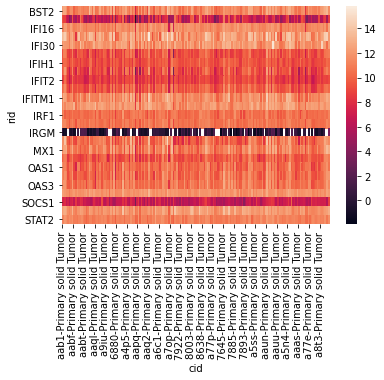

In [54]:
import seaborn as sns
ax = sns.heatmap(ifn1)

We can see the distribution of gene acorss different samples is like it has most values near 10 and 12, as the colour of heatmap near 10 and 12 is most likely observed. The blue has less frequency.